In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [51]:
df = pd.read_csv("Cornescu_Darius_new_features.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice,LotArea_m^2,Price_per_m^2,ZoningScore,SubClassScore,LotAreaNorm,PDI,Price_per_m^2_norm,EVI
0,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,145000,780.385200,185.805676,0.795605,0.105263,0.033186,0.359777,0.168856,0.344162
1,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,178000,728.080811,244.478356,0.795605,0.315789,0.030555,0.422145,0.226847,0.415263
2,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,85000,815.409631,104.242085,0.795605,0.157895,0.034948,0.376095,0.088239,0.314380
3,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,175000,668.901600,261.622935,0.795605,0.263158,0.027577,0.405462,0.243793,0.413210
4,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,127000,464.515000,273.403442,0.795605,0.263158,0.017294,0.402378,0.255437,0.419031


In [52]:
def make_preprocessor(dataframe):
    numeric_features = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

    return preprocessor

In [64]:
def run_classification_pipeline(dataframe, number_bins, labels = None, random_state=42):
    
    target = "SalePrice"
    prices = dataframe[target].copy()

    if labels is None:
        labels = list(range(number_bins))

    Y = pd.qcut(prices, q=number_bins, labels=labels)
    X = dataframe.drop(columns=[target])

    preprocessor = make_preprocessor(X)
    classifier = DecisionTreeClassifier(random_state=random_state)

    Pipeline_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)

    Pipeline_steps.fit(X_train, Y_train)
    Y_pred = Pipeline_steps.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred, labels = classifier.classes_)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Classification Report:\n", report)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues)

    return Pipeline_steps

Accuracy: 0.905982905982906
F1 Score: 0.9061779098469381
Classification Report:
               precision    recall  f1-score   support

       cheap       0.93      0.95      0.94        79
   expensive       0.95      0.90      0.92        78
      medium       0.85      0.87      0.86        77

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234



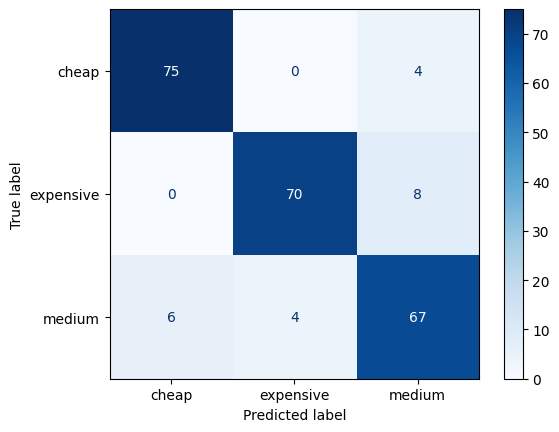

In [65]:
labels_3 = ["cheap", "medium", "expensive"]
res_3 = run_classification_pipeline(df, number_bins=3, labels=labels_3)

Accuracy: 0.5213675213675214
F1 Score: 0.5220887749182899
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.68      0.64        22
           1       0.40      0.29      0.33        21
           2       0.52      0.52      0.52        21
           3       0.48      0.68      0.57        22
           4       0.41      0.43      0.42        21
           5       0.27      0.33      0.30        21
           6       0.35      0.33      0.34        21
           7       0.53      0.45      0.49        22
           8       0.59      0.62      0.60        21
           9       0.85      0.52      0.65        21
          10       0.90      0.86      0.88        21

    accuracy                           0.52       234
   macro avg       0.54      0.52      0.52       234
weighted avg       0.54      0.52      0.52       234



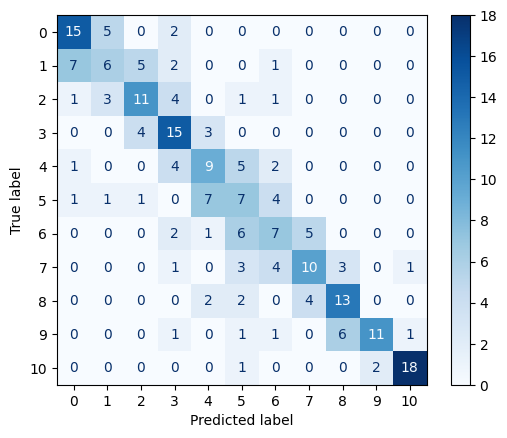

In [66]:
k_opt = 11
res_k = run_classification_pipeline(df, number_bins=k_opt)